***Hospital Patients Prediction And Forecasting Using Stacked LSTM***

In [1]:
import pandas as pd

In [3]:
df=pd.read_csv('AAPL.csv')

In [4]:
df.head()

,Unnamed: 0,Hospital name,date,No of patients,Majority of gender,Majority of problems
0,0,KALASALINGAM HOSPITAL,2015-05-27 00:00:00+00:00,132,Male,cold
1,1,KALASALINGAM HOSPITAL,2015-05-28 00:00:00+00:00,132,Female,fever
2,2,KALASALINGAM HOSPITAL,2015-05-29 00:00:00+00:00,130,Male,headache
3,3,KALASALINGAM HOSPITAL,2015-06-01 00:00:00+00:00,131,Female,jaundies
4,4,KALASALINGAM HOSPITAL,2015-06-02 00:00:00+00:00,130,Male,colera


In [5]:
df.tail()

,Unnamed: 0,Hospital name,date,No of patients,Majority of gender,Majority of problems
1253,1253,KALASALINGAM HOSPITAL,2020-05-18 00:00:00+00:00,315,Female,rashes
1254,1254,KALASALINGAM HOSPITAL,2020-05-19 00:00:00+00:00,313,Male,cold
1255,1255,KALASALINGAM HOSPITAL,2020-05-20 00:00:00+00:00,319,Female,fever
1256,1256,KALASALINGAM HOSPITAL,2020-05-21 00:00:00+00:00,317,Male,headache
1257,1257,KALASALINGAM HOSPITAL,2020-05-22 00:00:00+00:00,319,Female,jaundies


In [7]:
df1=df.reset_index()['No of patients']

In [8]:
df1

0       132
1       132
2       130
3       131
4       130
       ... 
1253    315
1254    313
1255    319
1256    317
1257    319
Name: No of patients, Length: 1258, dtype: int64

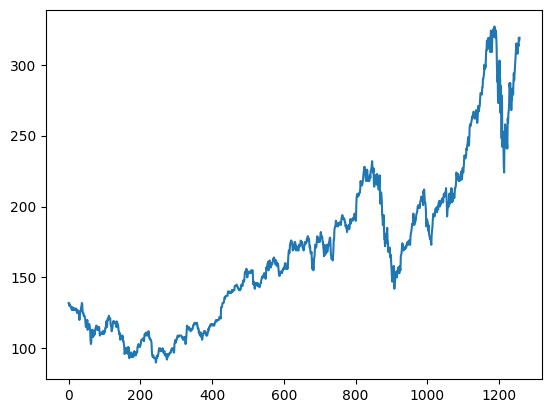

In [9]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [10]:
import numpy as np

In [11]:
df1

0       132
1       132
2       130
3       131
4       130
       ... 
1253    315
1254    313
1255    319
1256    317
1257    319
Name: No of patients, Length: 1258, dtype: int64

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [13]:
print(df1)

[[0.17721519]
 [0.17721519]
 [0.16877637]
 ...
 [0.96624473]
 [0.95780591]
 [0.96624473]]


In [14]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [15]:
training_size,test_size

(817, 441)

In [16]:
train_data

array([[0.17721519],
       [0.17721519],
       [0.16877637],
       [0.17299578],
       [0.16877637],
       [0.16877637],
       [0.16455696],
       [0.16455696],
       [0.16033755],
       [0.15611814],
       [0.16455696],
       [0.16455696],
       [0.15611814],
       [0.15611814],
       [0.16033755],
       [0.15611814],
       [0.16033755],
       [0.15611814],
       [0.16033755],
       [0.15611814],
       [0.16033755],
       [0.16033755],
       [0.15611814],
       [0.14767932],
       [0.14767932],
       [0.15611814],
       [0.15189873],
       [0.15189873],
       [0.15189873],
       [0.13924051],
       [0.12658228],
       [0.13924051],
       [0.15189873],
       [0.15189873],
       [0.15611814],
       [0.16455696],
       [0.16877637],
       [0.17721519],
       [0.17299578],
       [0.14767932],
       [0.14767932],
       [0.14767932],
       [0.13924051],
       [0.13924051],
       [0.13924051],
       [0.1350211 ],
       [0.13080169],
       [0.118

In [17]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [18]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [19]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [20]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [21]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [22]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [23]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 9s 305ms/step - loss: 0.0173 - val_loss: 0.0644
Epoch 2/100
12/12 [==============================] - 4s 328ms/step - loss: 0.0039 - val_loss: 0.0042
Epoch 3/100
12/12 [==============================] - 2s 169ms/step - loss: 0.0010 - val_loss: 0.0057
Epoch 4/100
12/12 [==============================] - 3s 287ms/step - loss: 8.2480e-04 - val_loss: 0.0037
Epoch 5/100
12/12 [==============================] - 2s 194ms/step - loss: 6.8792e-04 - val_loss: 0.0040
Epoch 6/100
12/12 [==============================] - 2s 170ms/step - loss: 6.2307e-04 - val_loss: 0.0041
Epoch 7/100
12/12 [==============================] - 3s 259ms/step - loss: 6.0182e-04 - val_loss: 0.0047
Epoch 8/100
12/12 [==============================] - 2s 170ms/step - loss: 6.4125e-04 - val_loss: 0.0045
Epoch 9/100
12/12 [==============================] - 2s 170ms/step - loss: 5.9304e-04 - val_loss: 0.0049
Epoch 10/100
12/12 [==============================] - 2s 169ms/step

In [26]:
import tensorflow as tf

In [27]:
tf.__version__

'2.15.0'

In [28]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 1s 51ms/step


In [29]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [30]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

140.46318238860238

In [31]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

232.98164870824127

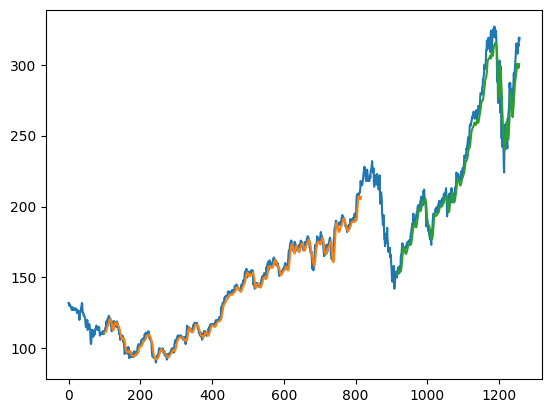

In [32]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [33]:
len(test_data)

441

In [34]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 100)

In [35]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [36]:
temp_input

[0.860759493670886,
 0.8860759493670884,
 0.8734177215189871,
 0.8860759493670884,
 0.8776371308016877,
 0.8987341772151898,
 0.9282700421940926,
 0.9282700421940926,
 0.9578059071729956,
 0.9409282700421939,
 0.9324894514767932,
 0.9493670886075949,
 0.9662447257383966,
 0.9578059071729956,
 0.962025316455696,
 0.9662447257383966,
 0.962025316455696,
 0.9240506329113922,
 0.962025316455696,
 0.9873417721518987,
 0.9873417721518987,
 0.9282700421940926,
 0.9240506329113922,
 0.9662447257383966,
 0.9746835443037973,
 0.991561181434599,
 0.970464135021097,
 0.9789029535864977,
 0.970464135021097,
 0.9999999999999998,
 0.991561181434599,
 0.991561181434599,
 0.9662447257383966,
 0.9873417721518987,
 0.970464135021097,
 0.9409282700421939,
 0.8776371308016877,
 0.8354430379746833,
 0.8565400843881856,
 0.7763713080168775,
 0.7721518987341771,
 0.8818565400843881,
 0.8396624472573839,
 0.8987341772151898,
 0.8565400843881856,
 0.8396624472573839,
 0.7426160337552741,
 0.8227848101265822,
 0

In [37]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.9104938]
101
1 day input [0.88607595 0.87341772 0.88607595 0.87763713 0.89873418 0.92827004
 0.92827004 0.95780591 0.94092827 0.93248945 0.94936709 0.96624473
 0.95780591 0.96202532 0.96624473 0.96202532 0.92405063 0.96202532
 0.98734177 0.98734177 0.92827004 0.92405063 0.96624473 0.97468354
 0.99156118 0.97046414 0.97890295 0.97046414 1.         0.99156118
 0.99156118 0.96624473 0.98734177 0.97046414 0.94092827 0.87763713
 0.83544304 0.85654008 0.77637131 0.7721519  0.88185654 0.83966245
 0.89873418 0.85654008 0.83966245 0.74261603 0.82278481 0.78059072
 0.66666667 0.79324895 0.64135021 0.68776371 0.66244726 0.65400844
 0.58649789 0.56540084 0.66244726 0.65822785 0.70886076 0.66666667
 0.69620253 0.69198312 0.6371308  0.65400844 0.6371308  0.7257384
 0.71308017 0.74261603 0.75105485 0.7721519  0.83122363 0.8185654
 0.83122363 0.81434599 0.78902954 0.75105485 0.78481013 0.78059072
 0.81434599 0.81434599 0.79746835 0.83544304 0.86075949 0.83966245
 0.85654008 0.87763713 0.89029536 0.

In [38]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [39]:
import matplotlib.pyplot as plt

In [40]:
len(df1)

1258

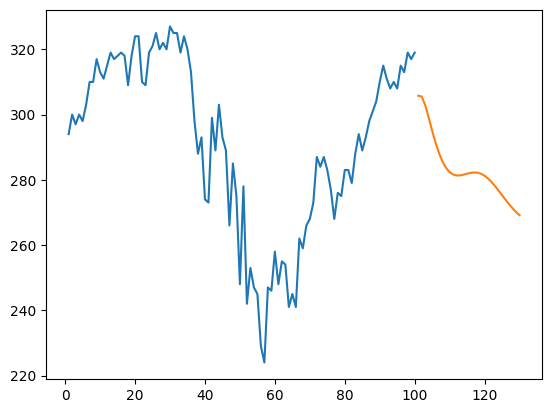

In [41]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

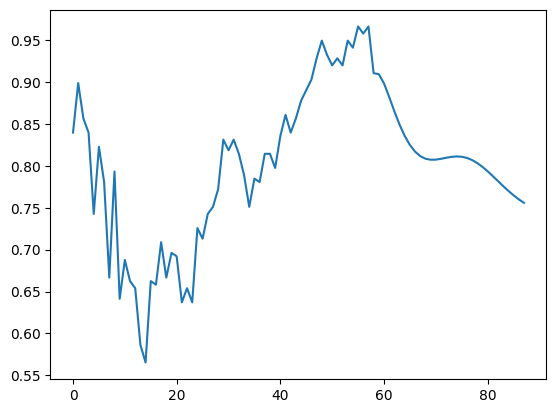

In [42]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [43]:
df3=scaler.inverse_transform(df3).tolist()

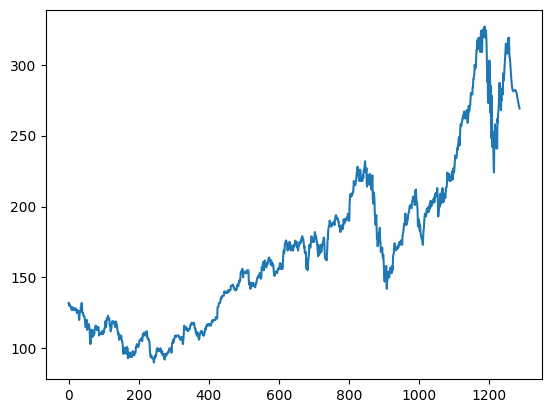

In [44]:
plt.plot(df3)